# Schere, Stein, Papier - Multiplayer
### - Lösung - 

## Add-On: Mehr als zwei Spieler

Wir wollen an den ersten Teil der Aufgabe anknüpfen und uns überlegen wie bei "Schere-Stein-Papier" mehr als zwei Spieler gegeneinander antreten können. Für diese Aufgabe verwenden wir wieder die klassische Version des Spiels mit drei Handzeichen.

Um das Spiel mit mehr als zwei Spielern zu spielen, gibt es mehrere Möglichkeiten.
Wenn die Anzahl der Spieler eine Zweierpotenz ist, dann kann man ein K.-o.-System verwenden, wie es z. B. ab dem Achtelfinale bei großen Fußballturnieren auch verwendet wird. Dabei treten immer nur zwei Spieler gegeneinander an und die Gewinnerin oder der Gewinner jeder Stufe kommen je eine Runde weiter, bis nach dem Finale das Ergebnis feststeht.
Im ersten Teil der Aufgabe wollen wir so ein K.o.-System programmieren und für eine bestimmte Anzahl an Spielern einen Tunierplan erstellen.

Da es bei so vielen Codeblöcken schnell unübersichtlich werden kann, haben wir eine Checkliste erstellt, was ihr für den ersten Teil implementieren müsst:
* Funktion, die testet ob die eingegebene Zahl eine Zweierpotenz ist.
* Funktion, die eine Liste mit Spielern in zufällige Paare unterteilt
* die Funktion tunierplan_erstellen() vervollständigen, sodass die Spieler in Runden solange gegeneinander spielen,
  bis alle außer ein Spieler ausgeschieden sind, welcher das Spiel gewinnt


Auf dieser Seite könnt ihr Informationen zu (Zweier)Potenzen finden:

https://www.mathematik.de/algebra/177-erste-hilfe/zahlenbereiche/nat%C3%BCrliche-zahlen/2307-potenzen (abgerufen am 01.05.2020)

In [1]:
# Die folgenden Pakete könnten nützlich für die Aufgaben sein
import numpy as np
import math

Der folgende Codeblock ist größtenteils von letzter Woche übernommen und definiert die Handzeichen, Regeln und zwei Funktionen um ein zufälliges Handzeichen auszuwählen und um zu ermitteln welcher von zwei Spielern eine Runde gewinnt.

In [2]:
# Python 3 kann mit utf-8 Zeichen umgehen, und auch mit Emojis!
schere = "💇 Schere"
stein = "🗿 Stein"
papier = "📝 Papier"

# ein dictionary mit den Regeln, d.h. Schere schlägt Papier, Stein schlägt Schere und Papier schlägt Stein
regeln = {
    schere : papier,
    stein : schere,
    papier : stein}

# Eine Hilfsfunktion, welche zufällig eines der drei möglichen Handzeichen zurückgibt
def zufaelliges_handzeichen():
    alle_zeichen = [schere, stein, papier]
    return np.random.choice(alle_zeichen)

# Wer hat gewonnen? Oder war es ein Unentschieden?
def spiele(handzeichen_1, handzeichen_2):
    if regeln[handzeichen_1] == handzeichen_2:
        return 0 # Spieler 1 gewinnt
    elif regeln[handzeichen_2] == handzeichen_1:
        return 1 # Spieler 2 gewinnt
    else:
        return None # Unentschieden

In [3]:
# fordert den User auf eine Spieleranzahl einzugeben und testet, ob eine ganze Zahl eingegeben wurde
def eingabe():
    while True:
        try:
            # input() nimmt Eingaben über die Tastatur auf
            anzahl = input("Bitte die Anzahl der Spieler eingeben: ")
            anzahl = int(anzahl)
            return anzahl
        # Falls keine ganze Zahl eingegeben wurde, Eingabe wiederholen
        except ValueError:
            print("Bitte eine Zahl eingeben.")

In [4]:
# testet ob die eingegebene Spieleranzahl mindestens 2 ist und zudem eine Zweierpotenz ist (also 2,4,8 usw.)
def zweierpotenz_test(anzahl):
    """Funktion, die testet ob die eingegebene Spieleranzahl mindestens 2 ist und zudem eine Zweierpotenz ist

    Parameters:
    anzahl (int): Spieleranzahl

    Returns:
    bool: True wenn obige Bedingungen erfüllt sind, ansonsten False

   """  
    if (anzahl >= 2) and (anzahl & (anzahl-1) == 0): # alternativ: math.log2(anzahl).is_integer()
        return True
    else:
        return False
    
# teste deine Funktion
# Wenn du einen AssertionError bekommst, dann funktioniert deine Funktion noch nicht richtig
assert zweierpotenz_test(8) == True
assert zweierpotenz_test(18) == False
assert zweierpotenz_test(1) == False

In [5]:
# Funktion, die eine Liste mit Spielern in zufällige Paare unterteilt
# Hier ist es wichtig, dass jeder Spieler nur einmal eingeteilt wird und niemand übrig bleibt
def zufaellige_paare(spieler_liste):
    """Funktion, die eine Liste mit Spielern in zufällige Paare unterteilt

    Parameters:
    spieler_liste (list): Liste mit den Spielern

    Returns:
    list: Liste mit den Spielerpaaren (z.B. [["Spieler_1","Spieler_3"],["Spieler_4","Spieler_2]])

   """
    
    paar_liste = []
    
    for i in range(len(spieler_liste)//2):
        paar = list(np.random.choice(spieler_liste,size=2,replace=False))
        paar_liste.append(paar)
        spieler_liste.remove(paar[0])
        spieler_liste.remove(paar[1])
        
    return paar_liste

# teste deine Funktion
spieler = ['Spieler_1 ','Spieler_2 ','Spieler_3 ','Spieler_4 ','Spieler_5 ','Spieler_6 ','Spieler_7 ','Spieler_8 ']
print(zufaellige_paare(spieler))

[['Spieler_1 ', 'Spieler_6 '], ['Spieler_5 ', 'Spieler_8 '], ['Spieler_3 ', 'Spieler_4 '], ['Spieler_7 ', 'Spieler_2 ']]


Vervollständige die Funktion tunierplan_erstellen(), sodass so viele Runden gespielt werden bis ein endgültiger Gewinner ermittelt ist. Um eine Runde zu spielen, verwende die schon definierte Funktion spiele_runde().


Um den Output schöner zu gestalten, gib in jeder Runde die aktuelle Rundennummer aus.
Verwende dazu die auskommentierten print-Befehle und kopiere sie an die richtige Stelle in deinem Code:

In [6]:
#print('\n')
#print('Runde '+str(runde))
#print('========')

Tipps: es gibt mehrere Möglichkeiten diesen Teil der Aufgabe zu lösen, du kannst z.B.:

* eine for-Schleife verwenden und vorher ermitteln wie viele Runden benötigt werden für die gegebene Anzahl an Spielern

* eine while-Schleife verwenden, und als Bedingungen setzen, dass es noch mindestens zwei Spieler gibt

* die Aufgabe rekursiv lösen

In [7]:
def spiele_runde(spieler_liste):
    """Eine Spielrunde läuft wie folgt ab: 
       - die Spieler werden zufällig in Paare unterteilt
       - alle Paare spielen gegeneinander
       - die Sieger aller Spieler werden als Rundensieger zurückgegeben

    Parameters:
    spieler_liste (list): Liste mit den Spielern für diese Runde

    Returns:
    list: Liste mit den Gewinnern der Spiele (Rundengewinner)

   """
    
    # teilt Spieler in zufällige Paare ein
    paar_liste = zufaellige_paare(spieler_liste)
    
    gewinner_liste = []
    
    # jedes Paar spielt Schere-Stein-Papier gegeneinander, bis einer der beiden gewinnt
    for paar in paar_liste:
        gewinner = None
        
        while gewinner == None:
            handzeichen_spieler1 = zufaelliges_handzeichen()
            handzeichen_spieler2 = zufaelliges_handzeichen()

            gewinner = spiele(handzeichen_spieler1,handzeichen_spieler2)
            
        gewinner_liste.append(paar[gewinner])
        
        print('{} vs. {}: {} gewinnt die Runde!'.format(paar[0],paar[1],paar[gewinner]))
    
    # die Liste aller Rundengewinner wird zurückgegeben
    return gewinner_liste

In [8]:
def tunierplan_erstellen():
    
    anzahl_spieler = eingabe()

    # testet ob die eingegebene Spieleranzahl eine Zweierpotenz ist (also 2,4,8 usw.)
    while zweierpotenz_test(anzahl_spieler) == False:
        print("Die eingegebene Spieleranzahl ist leider keine Zweierpotenz (oder ist <2).")
        anzahl_spieler = eingabe()
    
    # erstellt eine Liste mit allen Spielern
    spieler_liste = []
    for spieler in range(1,anzahl_spieler+1):
        spieler_liste.append('Spieler_{:^2}'.format(spieler))
    
    anzahl_runden = int(math.log2(anzahl_spieler))

    for runde in range(1,anzahl_runden+1):
        print('\n')
        print('Runde '+str(runde))
        print('========')
        spieler_liste = spiele_runde(spieler_liste)
        
    gewinner = spieler_liste[0]
    
    print("\n")
    print("===================================")
    print("{} gewinnt das Spiel!!!".format(gewinner))
    print("===================================")

In [9]:
# teste die Funktion tunierplan_erstellen()
tunierplan_erstellen()

Bitte die Anzahl der Spieler eingeben: 4


Runde 1
Spieler_3  vs. Spieler_4 : Spieler_4  gewinnt die Runde!
Spieler_2  vs. Spieler_1 : Spieler_1  gewinnt die Runde!


Runde 2
Spieler_1  vs. Spieler_4 : Spieler_4  gewinnt die Runde!


Spieler_4  gewinnt das Spiel!!!


## Life is not fair, but life is not fair for everyone; which actually makes it fair. (unbekannt)


Ist die Anzahl Spieler keine Zweierpotenz, so wird dieses Verfahren unfair, da dann z. B. Spieler, für die kein Gegenspieler existiert, ohne zu gewinnen eine Runde weiter kommen.

Alternativ können auch mehrere Spieler zugleich spielen. Wenn alle Spieler das gleiche Handzeichen spielen, ist das Spiel natürlich unentschieden. Wenn insgesamt nur zwei Handzeichen gespielt werden, gibt es eine Gewinnergruppe und eine Verlierergruppe. Jedoch wird die Auswertung, wer die Runde gewonnen hat, schwieriger, wenn alle drei Handzeichen gespielt werden. Wer gewinnt, wenn bei einem Spiel mit fünf Spielern zweimal Stein, zweimal Papier und einmal Schere gezeigt sind? Man könnte nun über die Anzahl der Spieler, die das selbe Zeichen gespielt haben die Gewinner- und Verlierergruppen ermitteln. Alternativ kann die Regel auch sein, dass sobald alle drei Handzeichen gespielt sind, die Runde unentschieden ist.

Diese letzte Möglichkeit wollen wir nun näher betrachten. Insbesondere ist interessant, wie hoch die Wahrscheinlichkeit für ein Unentschieden ist, da das Spiel dann wiederholt werden muss. Die Wahrscheinlichkeit für ein Unentschieden steigt mit der Anzahl der Spieler schnell an. Es kann bei vielen Spielern also sehr lange dauern, bis eine Gewinnergruppe feststeht.

Deine Aufgabe ist es nun, viele zufällige Spiele mit einer unterschiedlichen Anzahl von Spielern zu simulieren und dabei zu erfassen, wie oft ein Unentschieden aufgetreten ist. Darauskannst du das Verhältnis zwischen der Anzahl an Unentschieden und Anzahl der Spiele bestimmen und dies in einen Graphen einzeichen.

[0.328, 0.4746, 0.6126, 0.7376, 0.8262, 0.882, 0.926, 0.9526, 0.9662, 0.9768, 0.9826, 0.9894, 0.9944, 0.9944, 0.9976, 0.9974, 0.9994, 0.9988, 0.9992, 0.9996, 0.9998, 0.9996]


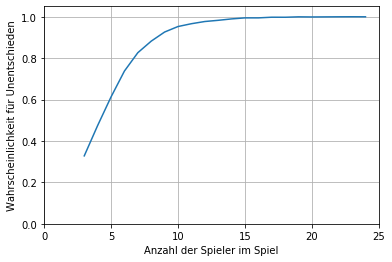

In [10]:
# Eine Hilfsfunktion, welche zufällig eines der drei möglichen Handzeichen zurückgibt
def zufaelliges_handzeichen():
    alle_zeichen = [schere, stein, papier]
    return np.random.choice(alle_zeichen)

# Eine Hilfsfunktion, die alle Duplikate aus der Liste enfernt und die Anzahl der
# nun verschiedenen Elemente zurückgibt
def anzahl_verschiedener_elemente(liste):
    return len(set(liste))

# Diese Funktion gibt eine Liste der Handzeichen zurück, die die Spieler (zufällig) gewählt haben.
def simuliere_spiel(anzahl_spieler):
    dieses_spiel = []
    for k in range(anzahl_spieler):
        dieses_spiel.append(zufaelliges_handzeichen())
    return dieses_spiel

# Diese Funktion gibt zurück, ob ein Spiel unentschieden ist,
# weil nur eines oder alle drei Handzeichen gezeigt wurden
def spiel_ist_unentschieden(spiel):
    anzahl_handzeichen = anzahl_verschiedener_elemente(spiel)
    return anzahl_handzeichen != 2

# In dieser Funktion wird die Wahrscheinlichkeit dafür, dass ein Spiel mit der gegeben
# Anzahl an Spielern unentschieden ausgeht ermittelt.
def wahrscheinlichkeit_unentschieden(anzahl_spieler):
    # Lege fest, wie viele Spiele jeweils gespielt werden sollen
    anzahl_zu_spielende = 5000
    anzahl_unentschieden = 0
    for spiel_nummer in range(anzahl_zu_spielende):
        if spiel_ist_unentschieden(simuliere_spiel(anzahl_spieler)):
            anzahl_unentschieden += 1
    return anzahl_unentschieden / anzahl_zu_spielende

# Lege fest, bis zu welcher Anzahl Spieler die Wahrscheinlichkeiten berechnet werden sollen
minimale_anzahl_spieler = 3
maximale_anzahl_spieler = 25

# Führe die Berechnung für verschiedene Anzahlen an Spielern aus
wahrscheinlichkeiten = []
for i in range(minimale_anzahl_spieler, maximale_anzahl_spieler):
    wahrscheinlichkeiten.append(wahrscheinlichkeit_unentschieden(i))

    
print(wahrscheinlichkeiten)
# Zeichne den Graphen
import matplotlib.pyplot as plt
plt.plot(range(minimale_anzahl_spieler, maximale_anzahl_spieler), wahrscheinlichkeiten)
#plt.plot(range(minimale_anzahl_spieler, maximale_anzahl_spieler), wahrscheinlichkeiten_berechnet)
plt.xlabel('Anzahl der Spieler im Spiel')
plt.ylabel('Wahrscheinlichkeit für Unentschieden')
plt.grid()
plt.axis([0.0, maximale_anzahl_spieler, 0.0, 1.05])
plt.show()

## Fragen & Feedback:

**Wenn ihr Fragen oder Anregungen zu der Aufgabe (oder Lösung) habt, dann tauscht euch gerne im [Chat](https://spectrum.chat/bwki/aufgabenarchiv/) darüber aus oder schreibt uns eine E-Mail (an info@bw-ki.de).**

Wir freuen uns auch immer über **Feedback** (auch unter info@bw-ki.de):

- War diese Aufgabe zu leicht, zu schwer oder genau richtig?
- Wie lang hast du für diese Aufgabe ungefähr gebraucht?
- Welche Art von Aufgaben wünschst du dir in Zukunft?